In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/data_prices_cleaned.csv')
print("Original DataFrame shape:", df.shape)


Original DataFrame shape: (8336, 17)


In [ ]:
print("\n" + "="*80)
print("STEP 1: CLEANING NUMERICAL COLUMNS")
print("="*80)

# Function to clean and convert numerical columns
def clean_numeric_column(series):
    """Clean and convert a series to numeric type"""
    cleaned_series = series.astype(str).str.replace(' ', '', regex=False)  # Remove spaces
    cleaned_series = cleaned_series.str.replace(',', '.', regex=False)  # Replace comma with dot for decimals
    # Replace common non-numeric strings with NaN
    cleaned_series = cleaned_series.replace(['À Vendre', 'À Louer', 'Location', '+', 'Ref924a', 'IFC Marsa', 'sale', 'nan', 'None'], pd.NA)
    # Convert to numeric, coercing errors to NaN
    return pd.to_numeric(cleaned_series, errors='coerce')

# Apply cleaning to numerical columns
df['superficie'] = clean_numeric_column(df['superficie'])
df['chambres'] = clean_numeric_column(df['chambres'])
df['salles_de_bains'] = clean_numeric_column(df['salles_de_bains'])
df['price'] = clean_numeric_column(df['price'])


print(f"✓ Cleaned 'superficie' - Type: {df['superficie'].dtype}")
print(f"✓ Cleaned 'chambres' - Type: {df['chambres'].dtype}")
print(f"✓ Cleaned 'salles_de_bains' - Type: {df['salles_de_bains'].dtype}")
print(f"✓ Converted 'price' to thousands - Type: {df['price'].dtype}")


STEP 1: CLEANING NUMERICAL COLUMNS
✓ Cleaned 'superficie' - Type: float64
✓ Cleaned 'chambres' - Type: float64
✓ Cleaned 'salles_de_bains' - Type: float64
✓ Converted 'price' to thousands - Type: float64


In [ ]:
df

,Unnamed: 0,location,price,currency,category,chambres,salles_de_bains,superficie,date,transaction,titles,descriptions,contact,shops,profiles,state,city
0,0,"Tunis,L Aouina",184998.0,DT,Appartements,1.0,1.0,55.0,2024-04-14 16:10:03.036864,sale,A Vendre un appartement s+1 direct promoteur à...,’agence MSM Immobilière vous propose à vendre ...,+21655066775,msm immo,https://tayara.tn/user/2ff1b856-e0eb-43d4-98ff...,Tunis,L Aouina
1,1,"Sousse,Chatt mariem",210000.0,DT,Appartements,2.0,1.0,71.0,2024-02-14 20:09:52.164435,sale,Appartement S+2 à chatt meriem,🤗🤗 Opportunité à saisir 🤗🤗\nVENDO IMMOBILIERE ...,+2169826462,vendo immobiliere,https://tayara.tn/shop/c39e4dc4-4256-48d4-bd2c...,Sousse,Chatt mariem
2,2,"Sousse,Sahloul",1300000.0,DT,Maisons et Villas,4.0,2.0,600.0,2024-04-14 15:10:24.881119,sale,Villa à Sahloul 3,l'agence immobilière #HPS vous propose la vent...,+21697387352,house presso & services,https://tayara.tn/shop/b03bbe27-28c6-49be-84f7...,Sousse,Sahloul
3,3,"Sousse,Kala Kebira",14000.0,DT,Terrains et Fermes,NaN,NaN,NaN,2024-04-14 15:10:27.072705,sale,Terrain 250 m²,l'agence immobilière HPS vous propose la vente...,+21697387352,house presso & services,https://tayara.tn/shop/b03bbe27-28c6-49be-84f7...,Sousse,Kala Kebira
4,4,"Ben Arous,Ezzahra",175000.0,DT,Appartements,2.0,0.0,85.0,2024-04-14 15:10:28.906526,sale,Appartement s+2 à Ezzahra,A vendre Appartement s+2 à Ezzahra\nsuperficie...,+21654653988,agence immobiliere sonis immo,https://tayara.tn/shop/a4022c2b-f222-45f0-badf...,Ben Arous,Ezzahra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,8331,"Tunis,La Marsa",1250.0,DT,Appartements,2.0,1.0,120.0,2024-03-14 21:27:50.130945,rent,marsa cité khalil,🏫À louer appartement s+2\n➡️la marsa cité khal...,+21652105564,h immo le kram,https://tayara.tn/shop/64898a684989c7d0060888e3/,Tunis,La Marsa
8332,8332,"Tunis,L Aouina",1250.0,DT,Appartements,2.0,1.0,100.0,2024-03-14 21:27:54.244195,rent,A louer s+2 haut standing avec place parking à...,A louer un App s+2 haut standing 1ére étage av...,+21699181802,confiance immo,https://tayara.tn/user/9e783b7d-9c43-4894-a00c...,Tunis,L Aouina
8333,8333,"Tunis,Lac 1",2000.0,DT,Bureaux et Plateaux,2.0,1.0,90.0,2024-03-14 21:27:55.470841,rent,A louer un bureau de deux pièces au Lac 1,Agence immobilière Le Carré 9 met à la locatio...,+21628177388,le carré 9,https://tayara.tn/shop/b9b965e7-3c88-4e4e-ad73...,Tunis,Lac 1
8334,8334,"Nabeul,Hammamet",260.0,DT,Appartements,2.0,1.0,75.0,2024-03-14 21:27:53.407068,rent,S2 de 75m² meublé avec balcon 10m2 à Yasmine H...,Cet appartement est situé au premier étage d'u...,+21628709000,easy home agence immobilière,https://tayara.tn/shop/e9339bc0-87c2-483a-9b5f...,Nabeul,Hammamet


In [ ]:
print("\n" + "="*80)
print("STEP 2: FILTERING DATA")
print("="*80)

print(f"Before filtering: {len(df):,} records")

# Rename columns as requested
df = df.rename(columns={
    'superficie': 'size',
    'chambres': 'room_count',
    'salles_de_bains': 'bathroom_count'
})

# Filter for Grand Tunis apartments for sale
grand_tunis_states = ['Ben Arous', 'Tunis', 'La Manouba', 'Ariana']
df = df[
    (df['transaction'] == 'sale') &
    (df['category'] == 'Appartements') &
    (df['state'].isin(grand_tunis_states))
].copy()

df['price'] = df['price']/1000
df = df[(df['size'] < 500) & (df['size'] >= 24)]
df= df[df['price']>20]
df=df[~(df['price']/df['size']>6)]

df = df[~((df['size'] > 70) & (df['price'] < 70))]
df= df[~((df['size']<90) & (df['price'])>1000)]
df=df[(df['room_count']>0) & (df['room_count']<10)]
df= df[df['bathroom_count']>=0]


# Drop multiple columns
df = df.drop(columns=['contact', 'category', 'location', 'descriptions', 'currency' , 'date','transaction','titles','shops','profiles'])





print(f"After filtering (Grand Tunis apartments for sale): {len(df):,} records")


STEP 2: FILTERING DATA
Before filtering: 8,336 records
After filtering (Grand Tunis apartments for sale): 566 records


In [ ]:
df

,Unnamed: 0,price,room_count,bathroom_count,size,state,city
0,0,184.998,1.0,1.0,55.0,Tunis,L Aouina
4,4,175.000,2.0,0.0,85.0,Ben Arous,Ezzahra
16,16,148.000,2.0,1.0,98.0,Ariana,Ghazela
19,19,330.000,3.0,2.0,100.0,Ben Arous,Mgrine
33,33,740.000,3.0,2.0,170.0,Tunis,Ain Zaghouan Nord
...,...,...,...,...,...,...,...
3878,3878,180.000,1.0,1.0,76.0,Ariana,Ghazela
3879,3879,180.000,1.0,1.0,54.0,Ariana,Ennasr
3880,3880,460.000,2.0,1.0,100.0,Tunis,La Marsa
3881,3881,450.000,3.0,2.0,186.5,Tunis,El Menzah 9


In [ ]:
print("\n" + "="*80)
print("STEP 3: REMOVING INVALID ROWS")
print("="*80)

print(f"Before removing NaN values: {len(df):,} records")

# Drop rows where key numerical columns are NaN
df.dropna(subset=['price', 'size', 'room_count', 'bathroom_count'], inplace=True)

print(f"After removing NaN values: {len(df):,} records")


STEP 3: REMOVING INVALID ROWS
Before removing NaN values: 566 records
After removing NaN values: 566 records


In [ ]:
print("\n" + "="*80)
print("FINAL DATAFRAME INFO")
print("="*80)
print(f"Final shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)

print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print("\nDescriptive statistics for key numerical columns (price in kTND):")
print(df[['price', 'size', 'room_count', 'bathroom_count']].describe())

print("\n" + "="*80)
print("SIZE STATISTICS")
print("="*80)
print(f"Mean: {df['size'].mean():.2f} m²")
print(f"Median: {df['size'].median():.2f} m²")
print(f"Min: {df['size'].min():.2f} m²")
print(f"Max: {df['size'].max():.2f} m²")
print(f"Std Dev: {df['size'].std():.2f} m²")
print(f"Count: {df['size'].count():,} records")

print("\n" + "="*80)
print("DATA READY FOR ANALYSIS!")
print("="*80)


FINAL DATAFRAME INFO
Final shape: (566, 7)

Data types:
Unnamed: 0          int64
price             float64
room_count        float64
bathroom_count    float64
size              float64
state              object
city               object
dtype: object

SUMMARY STATISTICS

Descriptive statistics for key numerical columns (price in kTND):
             price        size  room_count  bathroom_count
count   566.000000  566.000000  566.000000      566.000000
mean    323.613042  123.425265    2.461131        1.521201
std     188.018122   51.789949    0.996138        0.777158
min      47.000000   30.000000    1.000000        0.000000
25%     188.000000   88.250000    2.000000        1.000000
50%     280.000000  117.000000    2.000000        1.000000
75%     400.000000  146.750000    3.000000        2.000000
max    1600.000000  498.000000    8.000000        4.000000

SIZE STATISTICS
Mean: 123.43 m²
Median: 117.00 m²
Min: 30.00 m²
Max: 498.00 m²
Std Dev: 51.79 m²
Count: 566 records

DATA READY 

Descriptive statistics for 'size' column:


,size
count,566.000000
mean,123.425265
std,51.789949
min,30.000000
25%,88.250000
50%,117.000000
75%,146.750000
max,498.000000


/tmp/ipython-input-3449938632.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['size'], bins=30, kde=True, palette='viridis')


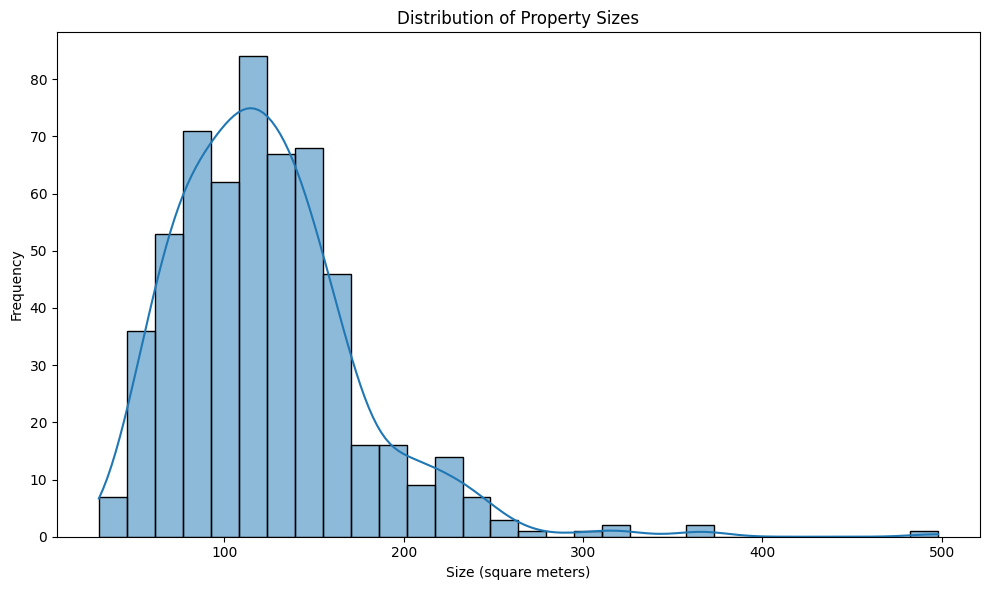

In [ ]:
print("Descriptive statistics for 'size' column:")
display(df['size'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['size'], bins=30, kde=True, palette='viridis')
plt.title('Distribution of Property Sizes')
plt.xlabel('Size (square meters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
df[df['size'] == 100000]

,Unnamed: 0,price,room_count,bathroom_count,size,state,city


In [ ]:
# Count apartments with size > 250
count = len(df[df['size'] > 250])
print(f"Apartments with size > 250 m²: {count}")

Apartments with size > 250 m²: 9


In [ ]:
count = len(df[df['size'] > 400])
print(f"Apartments with size > 250 m²: {count}")

Apartments with size > 250 m²: 1


In [ ]:
df[df['size']>400]

,Unnamed: 0,price,room_count,bathroom_count,size,state,city
3135,3135,700.0,7.0,3.0,498.0,Ben Arous,Medina Jedida


In [ ]:
df

,Unnamed: 0,price,room_count,bathroom_count,size,state,city
0,0,184.998,1.0,1.0,55.0,Tunis,L Aouina
4,4,175.000,2.0,0.0,85.0,Ben Arous,Ezzahra
16,16,148.000,2.0,1.0,98.0,Ariana,Ghazela
19,19,330.000,3.0,2.0,100.0,Ben Arous,Mgrine
33,33,740.000,3.0,2.0,170.0,Tunis,Ain Zaghouan Nord
...,...,...,...,...,...,...,...
3878,3878,180.000,1.0,1.0,76.0,Ariana,Ghazela
3879,3879,180.000,1.0,1.0,54.0,Ariana,Ennasr
3880,3880,460.000,2.0,1.0,100.0,Tunis,La Marsa
3881,3881,450.000,3.0,2.0,186.5,Tunis,El Menzah 9


In [ ]:
df['price'].describe()

,price
count,566.000000
mean,323.613042
std,188.018122
min,47.000000
25%,188.000000
50%,280.000000
75%,400.000000
max,1600.000000


In [ ]:
df[(df['size']<100 ) & (df['price']>1000)]

,Unnamed: 0,price,room_count,bathroom_count,size,state,city


In [ ]:
print("Descriptive statistics of price by bathroom count (in kTND):")
display(df.groupby('bathroom_count')['price'].describe())

Descriptive statistics of price by bathroom count (in kTND):


,count,mean,std,min,25%,50%,75%,max
bathroom_count,,,,,,,,
0.0,25.0,364.600000,243.417166,55.0,185.0,320.000,460.0,1100.0
1.0,291.0,240.862509,118.402633,47.0,160.0,215.000,280.0,750.0
2.0,185.0,365.897276,155.838439,78.0,272.0,340.000,420.0,1000.0
3.0,60.0,544.983267,225.264649,139.0,400.0,527.499,650.0,1600.0
4.0,5.0,713.800000,488.924534,190.0,250.0,879.000,900.0,1350.0


In [ ]:
print("Descriptive statistics of price by room count (in kTND):")
display(df.groupby('room_count')['price'].describe())

Descriptive statistics of price by room count (in kTND):


,count,mean,std,min,25%,50%,75%,max
room_count,,,,,,,,
1.0,100.0,218.679940,90.289237,78.000,168.99975,190.0000,240.00000,580.0
2.0,187.0,271.529380,145.695883,47.000,169.50000,240.0000,355.00000,900.0
3.0,214.0,366.294369,190.311164,90.000,250.00000,330.0000,450.00000,1600.0
4.0,55.0,480.218182,205.333756,130.000,357.50000,470.0000,585.00000,1100.0
5.0,6.0,680.333333,435.103053,162.000,382.50000,637.5000,907.50000,1350.0
6.0,2.0,289.999500,155.564199,179.999,234.99925,289.9995,344.99975,400.0
7.0,1.0,700.000000,NaN,700.000,700.00000,700.0000,700.00000,700.0
8.0,1.0,360.000000,NaN,360.000,360.00000,360.0000,360.00000,360.0


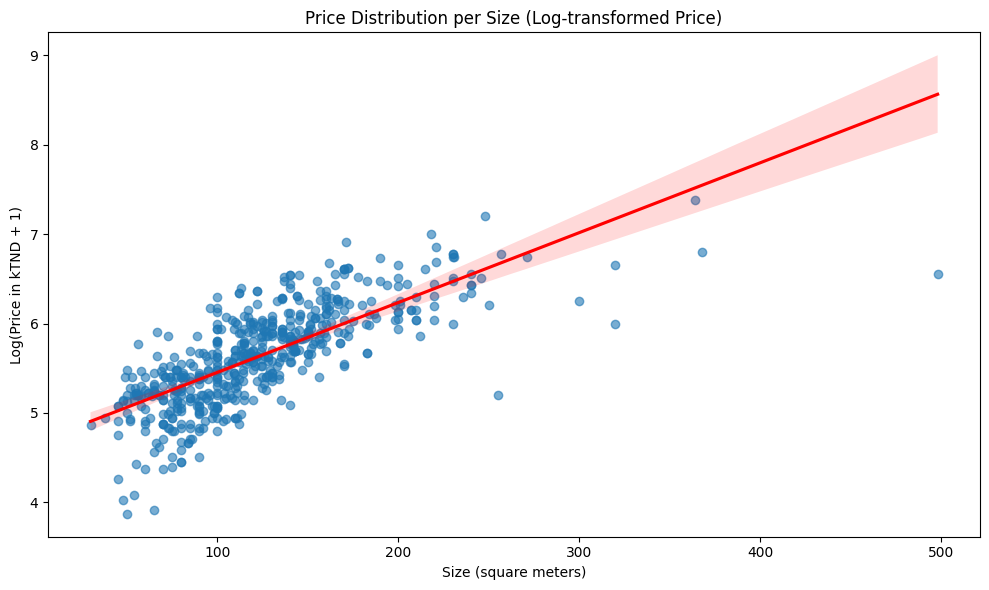

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='size', y=np.log1p(df['price']), data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Price Distribution per Size (Log-transformed Price)')
plt.xlabel('Size (square meters)')
plt.ylabel('Log(Price in kTND + 1)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4081212322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_count', palette='viridis')


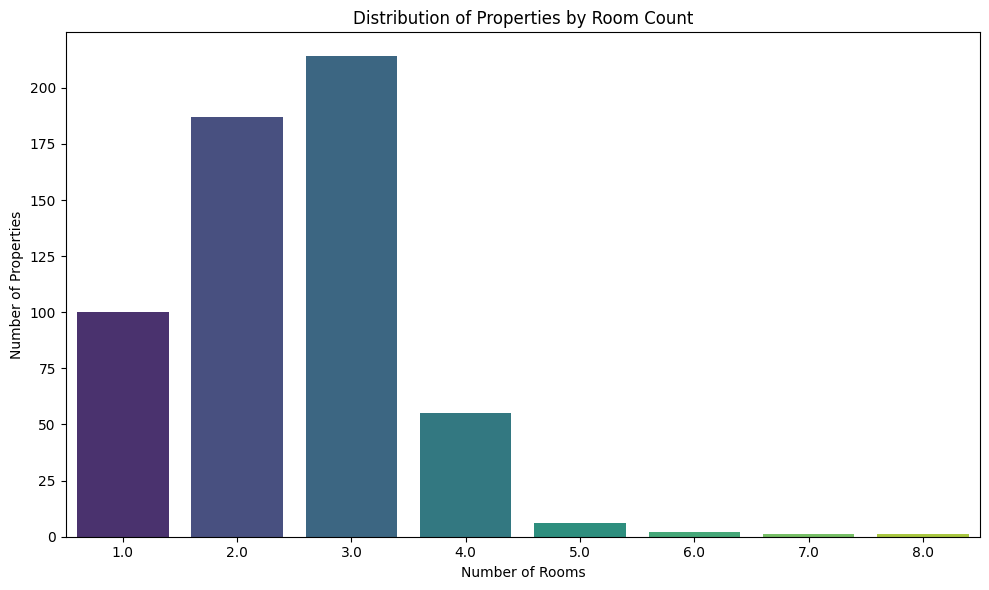

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_count', palette='viridis')
plt.title('Distribution of Properties by Room Count')
plt.xlabel('Number of Rooms')
plt.ylabel('Number of Properties')
plt.tight_layout()
plt.show()

Descriptive statistics for 'bathroom_count' column:


,bathroom_count
count,566.000000
mean,1.521201
std,0.777158
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


/tmp/ipython-input-2142359530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bathroom_count', palette='viridis')


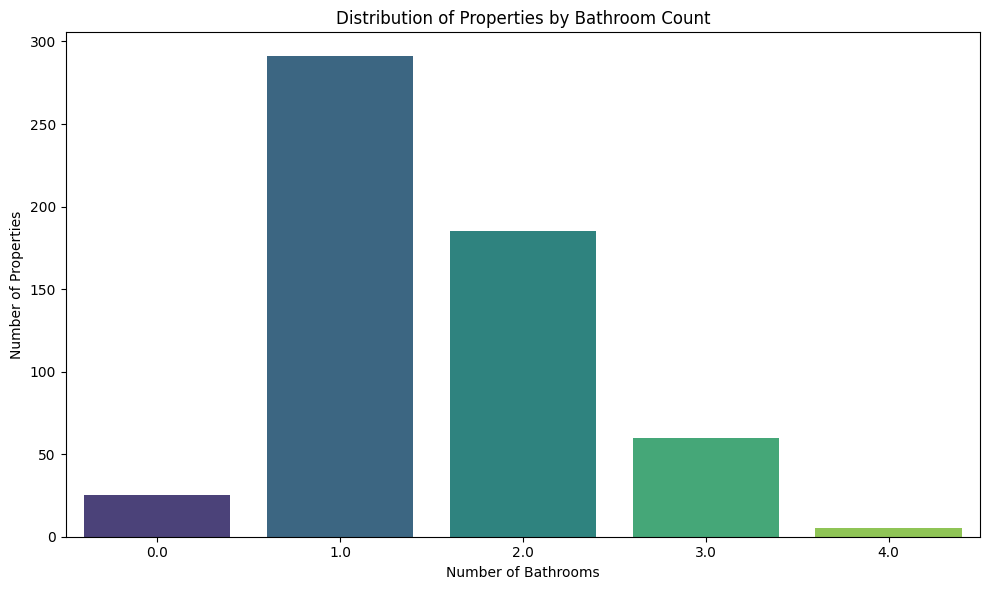

In [ ]:
print("Descriptive statistics for 'bathroom_count' column:")
display(df['bathroom_count'].describe())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bathroom_count', palette='viridis')
plt.title('Distribution of Properties by Bathroom Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Properties')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3947737237.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='state', order=df['state'].value_counts().index, palette='viridis')


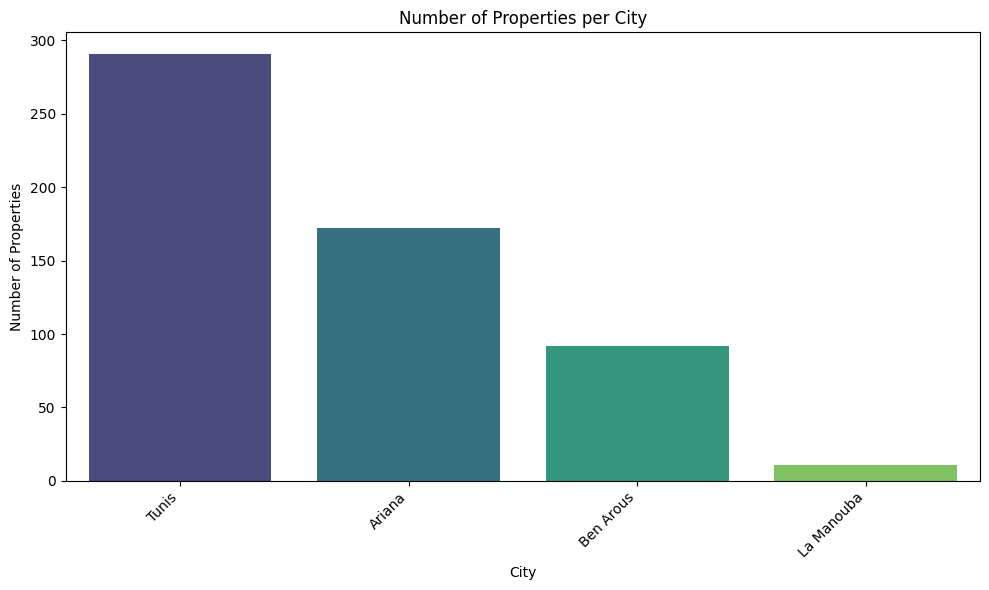

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index, palette='viridis')
plt.title('Number of Properties per City')
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-4040344950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='city', order=df['city'].value_counts().index, palette='viridis')


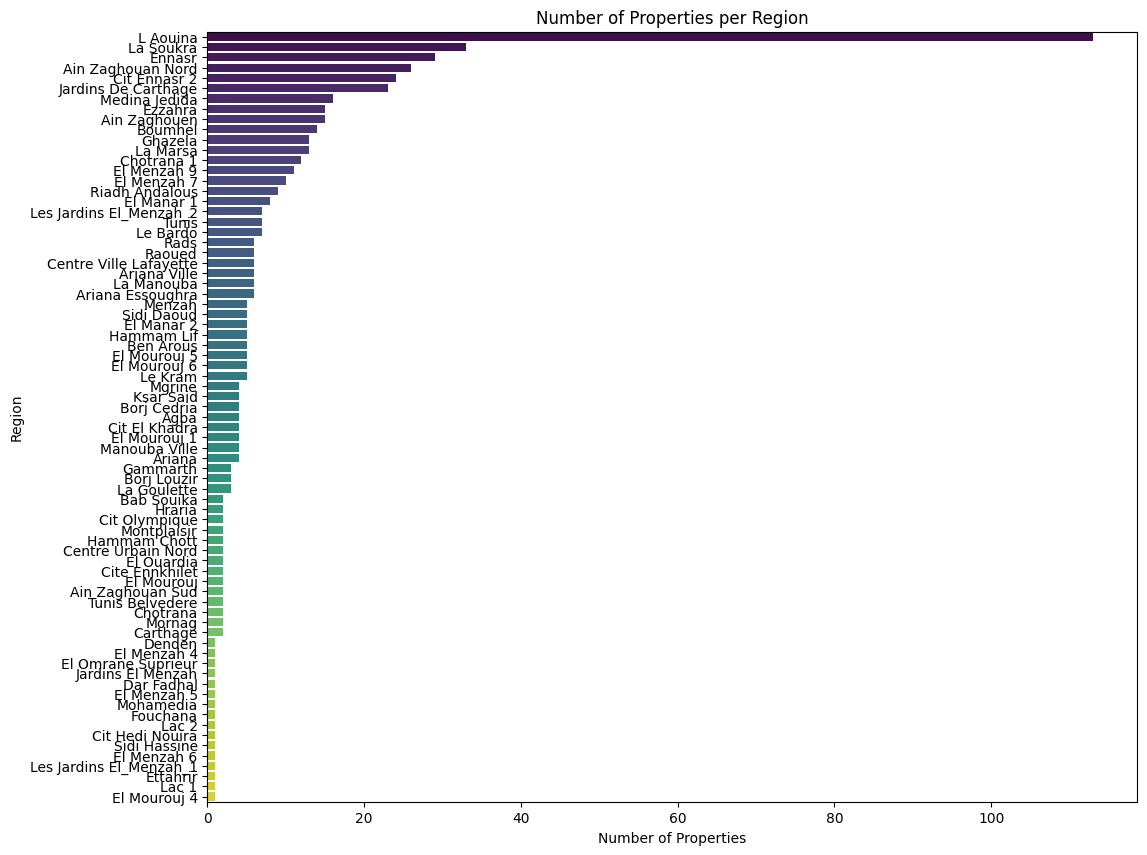

In [ ]:
plt.figure(figsize=(12, 10)) # Increased figure height for better spacing
sns.countplot(data=df, y='city', order=df['city'].value_counts().index, palette='viridis')
plt.title('Number of Properties per Region')
plt.xlabel('Number of Properties')
plt.ylabel('Region')
plt.show()

/tmp/ipython-input-1415903561.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=np.log1p(df['price']), palette='viridis')


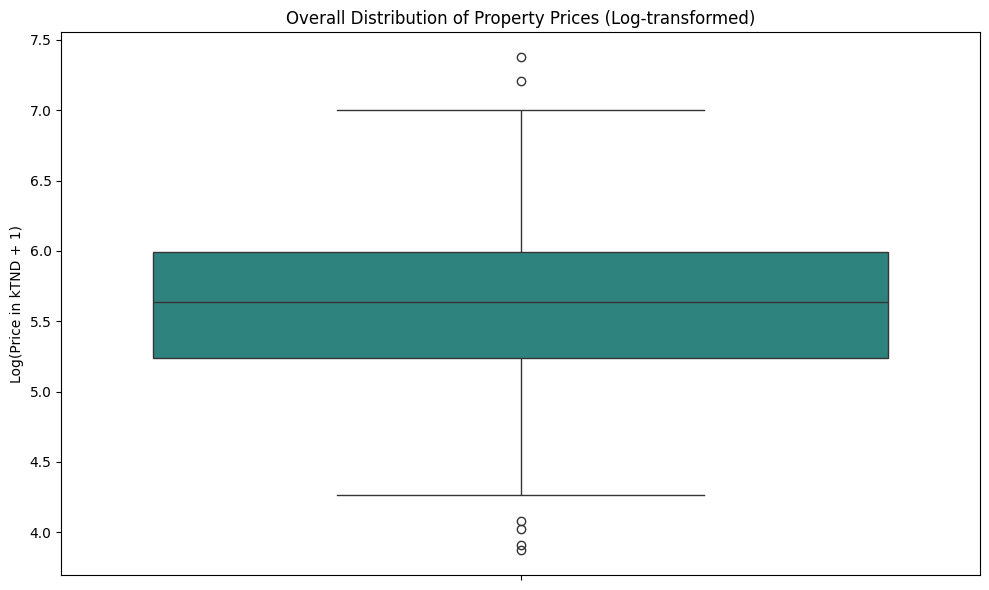

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(y=np.log1p(df['price']), palette='viridis')
plt.title('Overall Distribution of Property Prices (Log-transformed)')
plt.ylabel('Log(Price in kTND + 1)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2118349258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=np.log1p(df['price']), y='city', data=df.sort_values('price', ascending=False), palette='plasma')


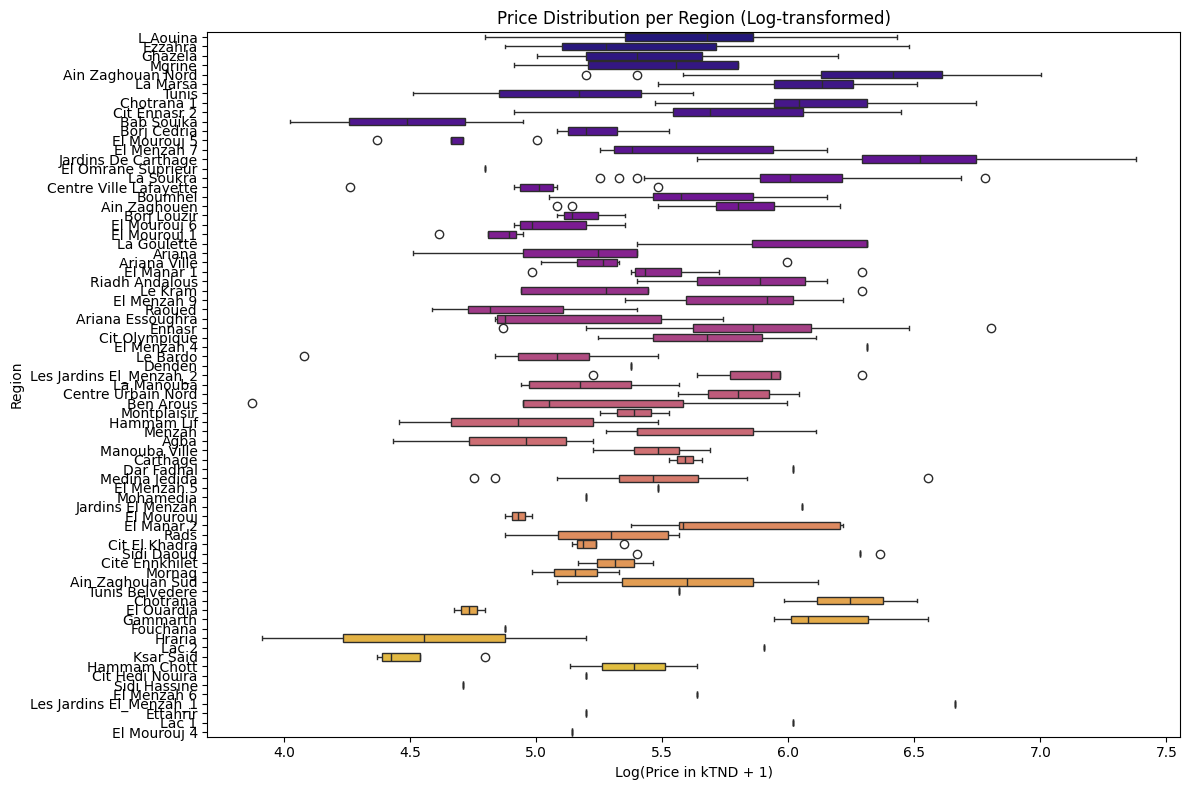

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x=np.log1p(df['price']), y='city', data=df.sort_values('price', ascending=False), palette='plasma')
plt.title('Price Distribution per Region (Log-transformed)')
plt.xlabel('Log(Price in kTND + 1)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

/tmp/ipython-input-349525132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=np.log1p(df['price']), y='state', data=df.sort_values('price', ascending=False), palette='mako')


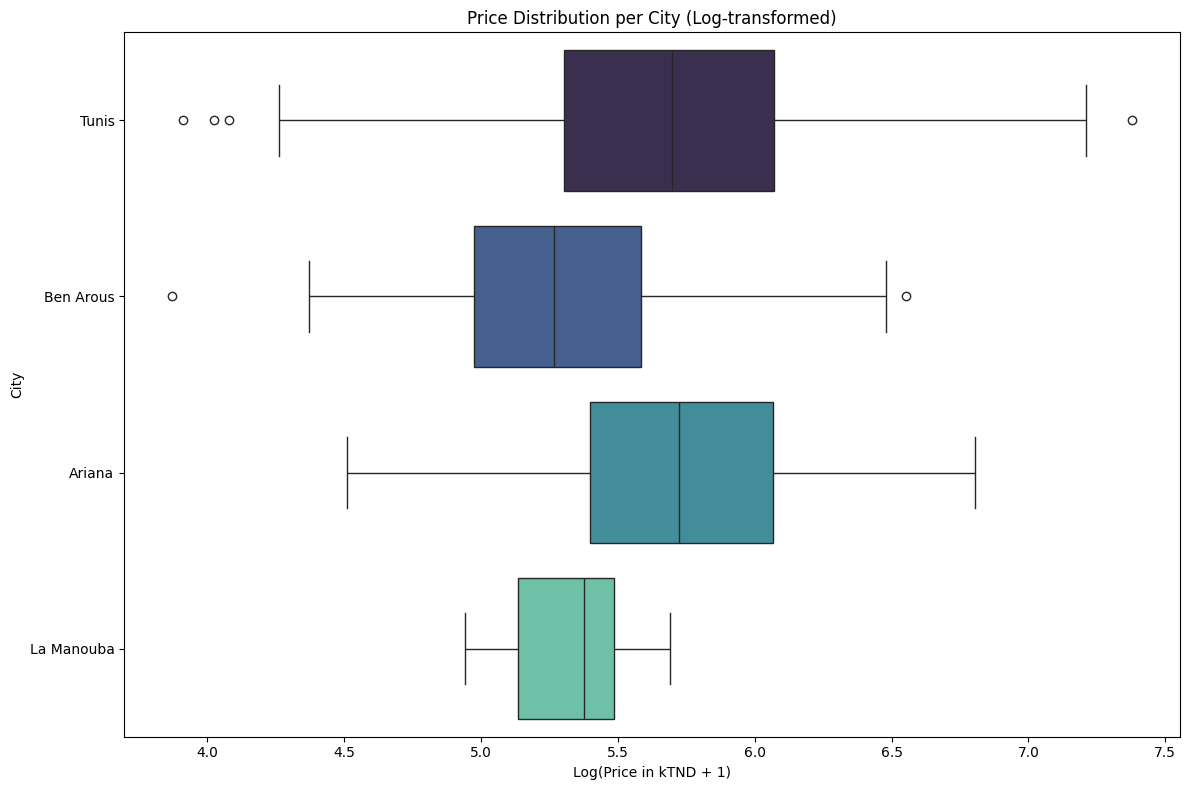

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(x=np.log1p(df['price']), y='state', data=df.sort_values('price', ascending=False), palette='mako')
plt.title('Price Distribution per City (Log-transformed)')
plt.xlabel('Log(Price in kTND + 1)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

/tmp/ipython-input-581143309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bathroom_count', y=np.log1p(df['price']), data=df, palette='cubehelix')


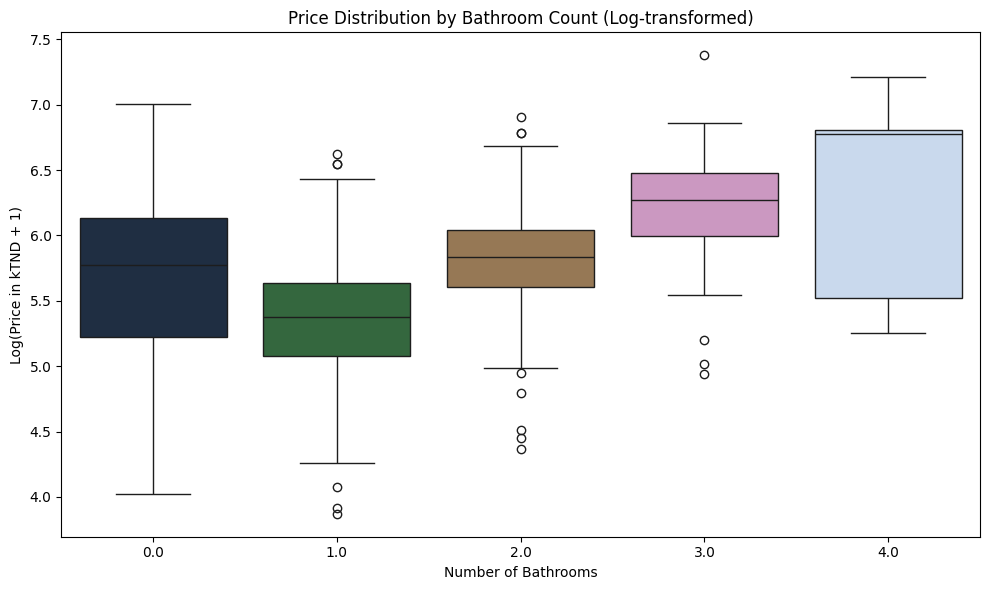

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathroom_count', y=np.log1p(df['price']), data=df, palette='cubehelix')
plt.title('Price Distribution by Bathroom Count (Log-transformed)')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log(Price in kTND + 1)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1169732167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_count', y=np.log1p(df['price']), data=df, palette='magma')


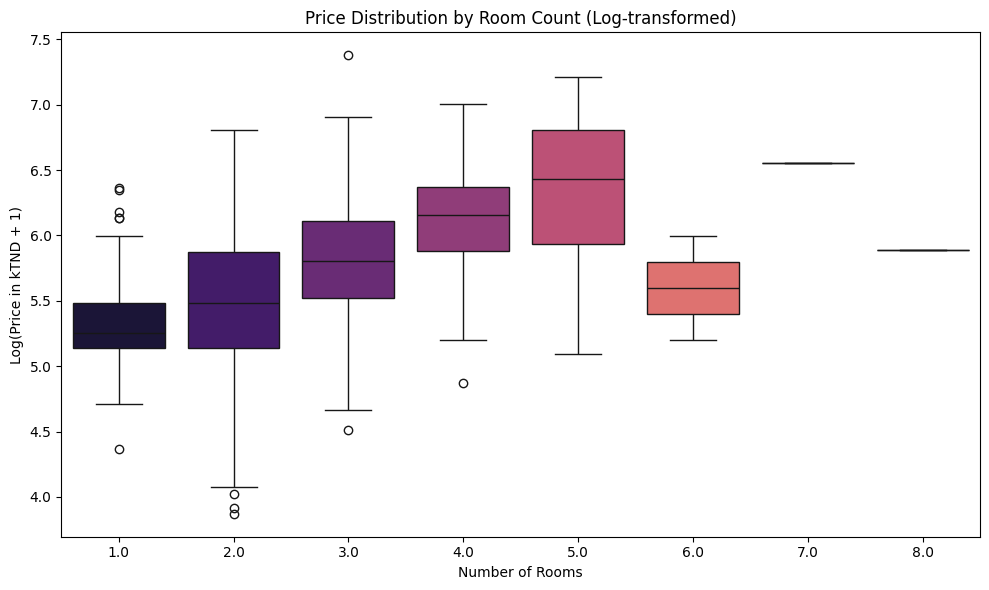

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_count', y=np.log1p(df['price']), data=df, palette='magma')
plt.title('Price Distribution by Room Count (Log-transformed)')
plt.xlabel('Number of Rooms')
plt.ylabel('Log(Price in kTND + 1)')
plt.tight_layout()
plt.show()

In [ ]:
df[df['price']/df['size']>6]

,Unnamed: 0,price,room_count,bathroom_count,size,state,city


In [ ]:
df.describe()

,Unnamed: 0,price,room_count,bathroom_count,size
count,566.000000,566.000000,566.000000,566.000000,566.000000
mean,1953.560071,323.613042,2.461131,1.521201,123.425265
std,1155.293902,188.018122,0.996138,0.777158,51.789949
min,0.000000,47.000000,1.000000,0.000000,30.000000
25%,783.750000,188.000000,2.000000,1.000000,88.250000
50%,2115.000000,280.000000,2.000000,1.000000,117.000000
75%,2963.250000,400.000000,3.000000,2.000000,146.750000
max,3886.000000,1600.000000,8.000000,4.000000,498.000000


# Using XGBoost

In [ ]:

# ============================================================================
# XGBOOST MACHINE LEARNING MODEL FOR APARTMENT PRICE PREDICTION
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [ ]:
print("\n📊 STEP 1: DATA PREPARATION")
print("-"*80)

# Define features and target
X = df[['room_count', 'bathroom_count', 'size']]
y = df['price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {list(X.columns)}")
print(f"Target column: price")

# Check for any remaining NaN values
print(f"\nMissing values in features:\n{X.isnull().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")


📊 STEP 1: DATA PREPARATION
--------------------------------------------------------------------------------
Features shape: (566, 3)
Target shape: (566,)

Feature columns: ['room_count', 'bathroom_count', 'size']
Target column: price

Missing values in features:
room_count        0
bathroom_count    0
size              0
dtype: int64
Missing values in target: 0


In [ ]:
print("\n🔀 STEP 2: SPLITTING DATA")
print("-"*80)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")


🔀 STEP 2: SPLITTING DATA
--------------------------------------------------------------------------------
Training set size: 452 (79.9%)
Test set size: 114 (20.1%)


In [ ]:
print("\n⚖️ STEP 3: FEATURE SCALING")
print("-"*80)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")


⚖️ STEP 3: FEATURE SCALING
--------------------------------------------------------------------------------
✓ Features scaled using StandardScaler


In [ ]:
print("\n🤖 STEP 4: BUILDING XGBOOST MODEL")
print("-"*80)

# Initialize XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

# Train the model
print("Training model...")
model.fit(X_train_scaled, y_train)
print("✓ Model trained successfully!")


🤖 STEP 4: BUILDING XGBOOST MODEL
--------------------------------------------------------------------------------
Training model...
✓ Model trained successfully!


In [ ]:
print("\n🎯 STEP 5: MAKING PREDICTIONS")
print("-"*80)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("✓ Predictions generated")


🎯 STEP 5: MAKING PREDICTIONS
--------------------------------------------------------------------------------
✓ Predictions generated


In [ ]:
print("\n📈 STEP 6: MODEL EVALUATION")
print("="*80)

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("\n📊 TRAINING SET PERFORMANCE:")
print(f"  MAE (Mean Absolute Error): {train_mae:.2f} TND")
print(f"  RMSE (Root Mean Squared Error): {train_rmse:.2f} TND")
print(f"  R² Score: {train_r2:.4f}")

print("\n📊 TEST SET PERFORMANCE:")
print(f"  MAE (Mean Absolute Error): {test_mae:.2f} TND")
print(f"  RMSE (Root Mean Squared Error): {test_rmse:.2f} TND")
print(f"  R² Score: {test_r2:.4f}")

# Cross-validation
print("\n🔄 CROSS-VALIDATION (5-fold):")
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5,
                            scoring='r2')
print(f"  R² Scores: {cv_scores}")
print(f"  Mean R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


📈 STEP 6: MODEL EVALUATION

📊 TRAINING SET PERFORMANCE:
  MAE (Mean Absolute Error): 54.32 TND
  RMSE (Root Mean Squared Error): 73.46 TND
  R² Score: 0.8516

📊 TEST SET PERFORMANCE:
  MAE (Mean Absolute Error): 74.62 TND
  RMSE (Root Mean Squared Error): 97.82 TND
  R² Score: 0.6908

🔄 CROSS-VALIDATION (5-fold):
  R² Scores: [0.67152561 0.59282111 0.47668167 0.45198186 0.520009  ]
  Mean R²: 0.5426 (+/- 0.1605)


In [ ]:
print("\n🎯 STEP 7: FEATURE IMPORTANCE")
print("-"*80)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)


🎯 STEP 7: FEATURE IMPORTANCE
--------------------------------------------------------------------------------
          Feature  Importance
2            size    0.725071
1  bathroom_count    0.151501
0      room_count    0.123429



📊 STEP 8: GENERATING VISUALIZATIONS
--------------------------------------------------------------------------------


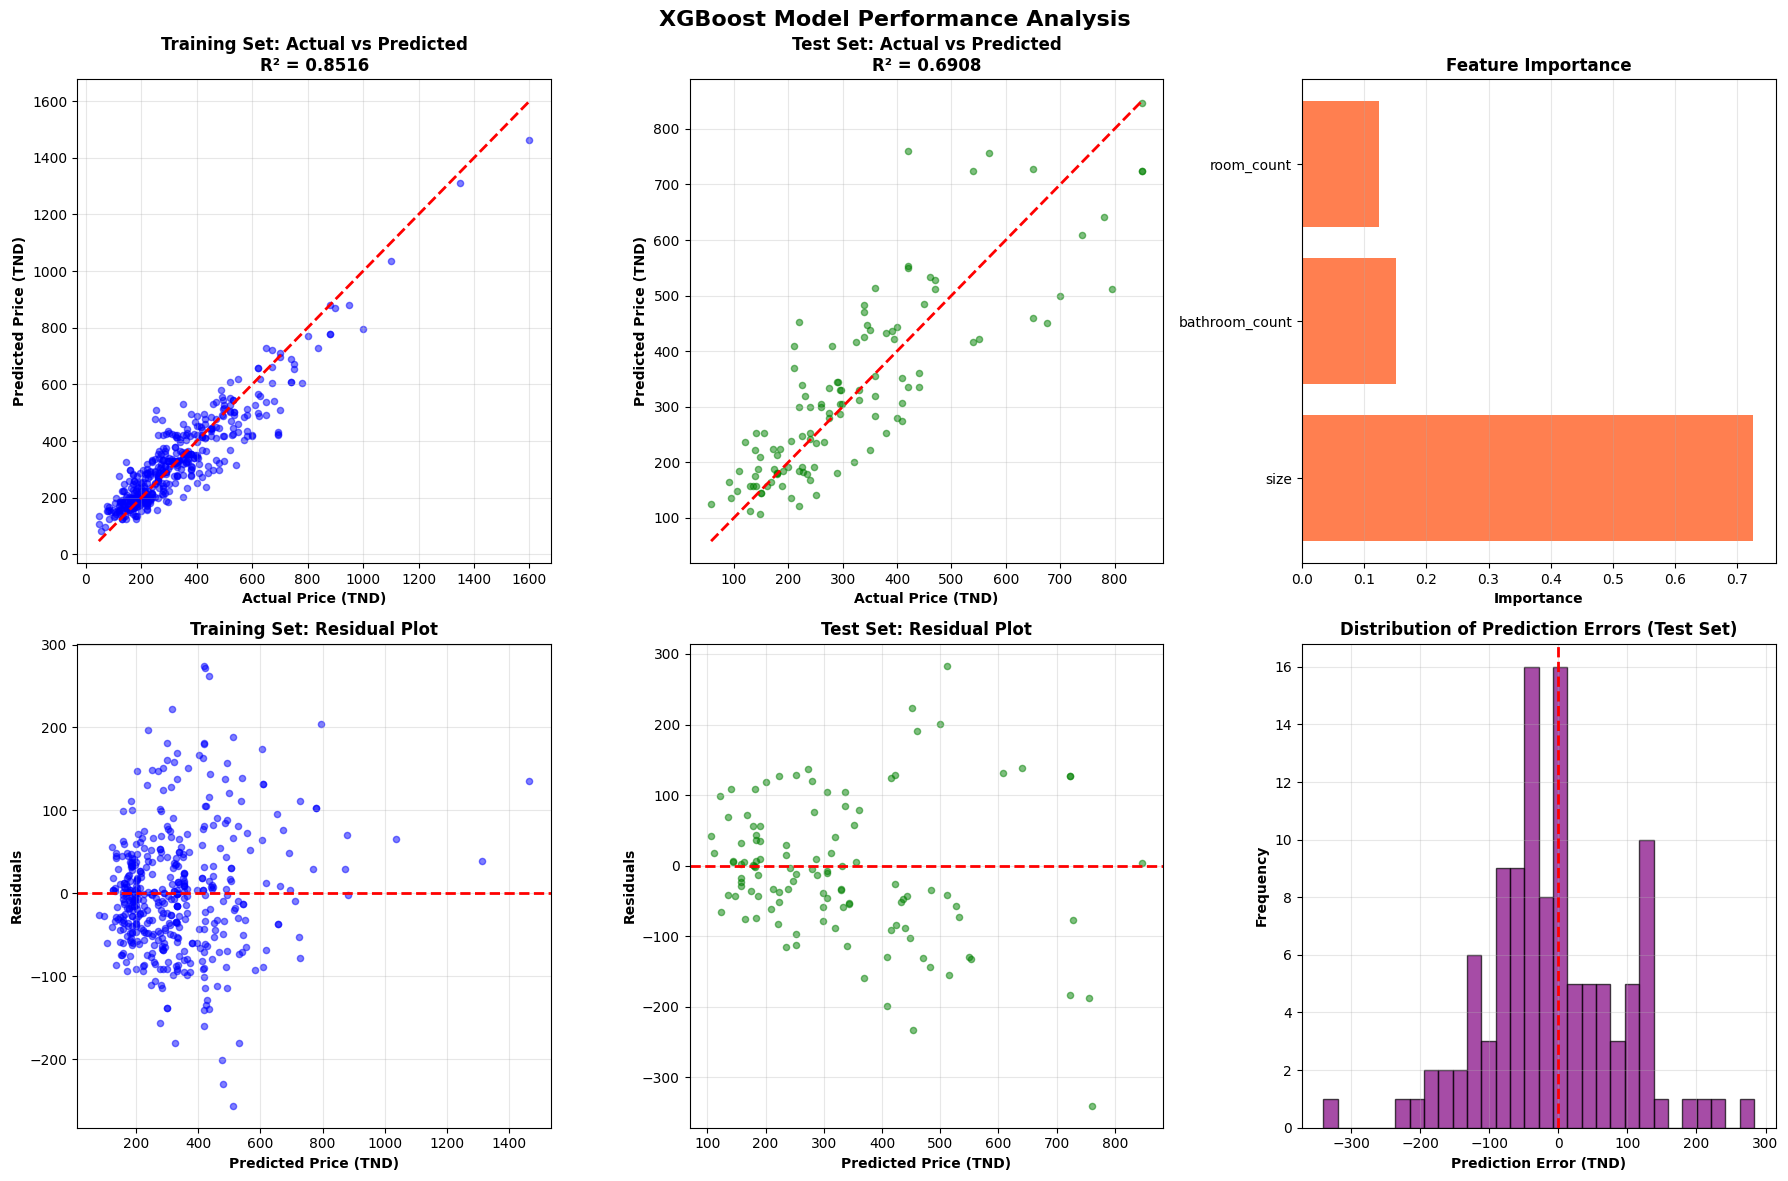

In [ ]:
print("\n📊 STEP 8: GENERATING VISUALIZATIONS")
print("-"*80)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('XGBoost Model Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.5, color='blue', s=20)
axes[0, 0].plot([y_train.min(), y_train.max()],
                [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price (TND)', fontweight='bold')
axes[0, 0].set_ylabel('Predicted Price (TND)', fontweight='bold')
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}',
                     fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Actual vs Predicted (Test)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.5, color='green', s=20)
axes[0, 1].plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Price (TND)', fontweight='bold')
axes[0, 1].set_ylabel('Predicted Price (TND)', fontweight='bold')
axes[0, 1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}',
                     fontweight='bold')
axes[0, 1].grid(alpha=0.3)

# Plot 3: Feature Importance
axes[0, 2].barh(feature_importance['Feature'], feature_importance['Importance'],
                color='coral')
axes[0, 2].set_xlabel('Importance', fontweight='bold')
axes[0, 2].set_title('Feature Importance', fontweight='bold')
axes[0, 2].grid(axis='x', alpha=0.3)

# Plot 4: Residuals (Training)
train_residuals = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.5, color='blue', s=20)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Price (TND)', fontweight='bold')
axes[1, 0].set_ylabel('Residuals', fontweight='bold')
axes[1, 0].set_title('Training Set: Residual Plot', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Plot 5: Residuals (Test)
test_residuals = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, test_residuals, alpha=0.5, color='green', s=20)
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Price (TND)', fontweight='bold')
axes[1, 1].set_ylabel('Residuals', fontweight='bold')
axes[1, 1].set_title('Test Set: Residual Plot', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

# Plot 6: Prediction Error Distribution
axes[1, 2].hist(test_residuals, bins=30, color='purple', alpha=0.7, edgecolor='black')
axes[1, 2].set_xlabel('Prediction Error (TND)', fontweight='bold')
axes[1, 2].set_ylabel('Frequency', fontweight='bold')
axes[1, 2].set_title('Distribution of Prediction Errors (Test Set)', fontweight='bold')
axes[1, 2].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
df

,Unnamed: 0,price,room_count,bathroom_count,size,state,city
0,0,184.998,1.0,1.0,55.0,Tunis,L Aouina
4,4,175.000,2.0,0.0,85.0,Ben Arous,Ezzahra
16,16,148.000,2.0,1.0,98.0,Ariana,Ghazela
19,19,330.000,3.0,2.0,100.0,Ben Arous,Mgrine
33,33,740.000,3.0,2.0,170.0,Tunis,Ain Zaghouan Nord
...,...,...,...,...,...,...,...
3878,3878,180.000,1.0,1.0,76.0,Ariana,Ghazela
3879,3879,180.000,1.0,1.0,54.0,Ariana,Ennasr
3880,3880,460.000,2.0,1.0,100.0,Tunis,La Marsa
3881,3881,450.000,3.0,2.0,186.5,Tunis,El Menzah 9


In [ ]:
print("\n" + "="*80)
print("STEP 9: PREPARING DATA FOR EXPORT")
print("="*80)

# Select and rename columns as requested by the user
df_export = df[['room_count', 'bathroom_count', 'size', 'price', 'state', 'city']].copy()
df_export = df_export.rename(columns={'state': 'city', 'city': 'region'})

print("Displaying the first 5 rows of the export-ready DataFrame:")
display(df_export.head())


STEP 9: PREPARING DATA FOR EXPORT
Displaying the first 5 rows of the export-ready DataFrame:


,room_count,bathroom_count,size,price,city,region
0,1.0,1.0,55.0,184.998,Tunis,L Aouina
4,2.0,0.0,85.0,175.000,Ben Arous,Ezzahra
16,2.0,1.0,98.0,148.000,Ariana,Ghazela
19,3.0,2.0,100.0,330.000,Ben Arous,Mgrine
33,3.0,2.0,170.0,740.000,Tunis,Ain Zaghouan Nord


In [ ]:
# Save the processed DataFrame to a CSV file
output_csv_path = 'processed_apartment_data.csv'
df_export.to_csv(output_csv_path, index=False)

print(f"\nData successfully saved to '{output_csv_path}'")
print(f"Exported DataFrame shape: {df_export.shape}")


Data successfully saved to 'processed_apartment_data.csv'
Exported DataFrame shape: (566, 6)
